In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud

pd.set_option('display.max_rows', None)

In [2]:
with open('../data/processed/merged_morfems_knu.txt', 'r', encoding='utf-8') as f:
    words = [line.strip() for line in f]

In [3]:
words_df = pd.DataFrame({'raw_words': words})

In [4]:
words_df['morphemes'] = words_df['raw_words'].apply(lambda x: x.split('/'))
words_df['n_morphemes'] = words_df['morphemes'].apply(lambda x: len(x))
words_df['n_letters'] = words_df['raw_words'].apply(lambda x: len(x)) - words_df['n_morphemes'] + 1

words_df['letter_by_morphemes'] = words_df['n_letters']/words_df['n_morphemes']

In [5]:
morphemes = words_df['morphemes'].explode().reset_index(drop=True)

In [6]:
morphemes_val_count = morphemes.value_counts().reset_index()

In [7]:
len(morphemes_val_count)

29952

In [8]:
morphemes_val_count[:20]

,morphemes,count
0,ий,49188
1,ти,47658
2,а,42518
3,н,39951
4,о,36496
5,ува,17926
6,я,17526
7,к,14099
8,ся,13980
9,и,13893


In [9]:
words_df.head(10)

,raw_words,morphemes,n_morphemes,n_letters,letter_by_morphemes
0,аби,[аби],1,3,3.000000
1,аби/-то,"[аби, -то]",2,6,3.000000
2,або,[або],1,3,3.000000
3,або/щ/о,"[або, щ, о]",3,5,1.666667
4,авраам,[авраам],1,6,6.000000
5,агар/ян/ськ/ий,"[агар, ян, ськ, ий]",4,11,2.750000
6,адам,[адам],1,4,4.000000
7,а/кафіст,"[а, кафіст]",2,7,3.500000
8,алілуjа,[алілуjа],1,7,7.000000
9,алмаз,[алмаз],1,5,5.000000


# Analysis

In [10]:
print(f"Total words - {len(words_df)}")

Total words - 204624


In [11]:
print(f"Total morphemes - {len(morphemes)}")

Total morphemes - 794219


In [12]:
print(f"Avg morphemes per word - {words_df['n_morphemes'].mean()}")

Avg morphemes per word - 3.8813580029713033


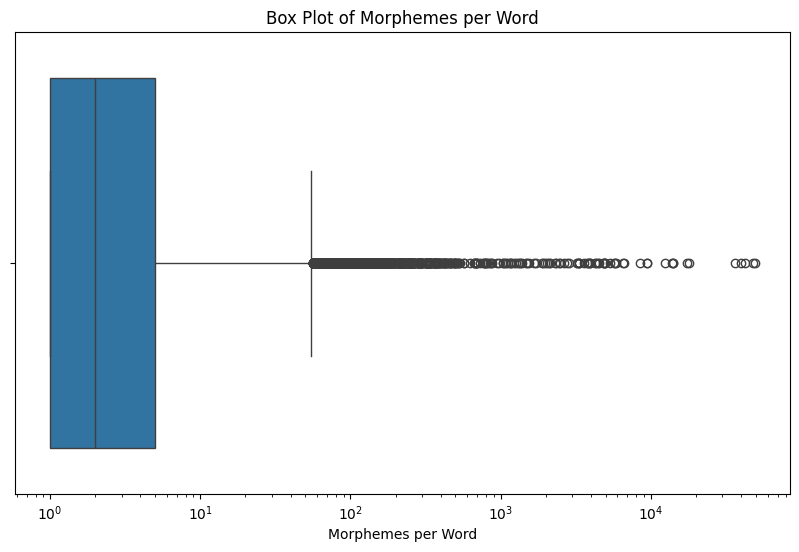

In [13]:
plt.figure(figsize=(10, 6))

# Box plot
sns.boxplot(x=morphemes_val_count['count'], log_scale=True)

# Labels and title
plt.xlabel("Morphemes per Word")
plt.title("Box Plot of Morphemes per Word")

plt.show()

### Number of morphemes

In [14]:
n_morphemes_value_counts = words_df['n_morphemes'].value_counts()

In [15]:
n_morphemes_value_counts.head()

n_morphemes
4    63712
5    46155
3    42972
2    22013
6    14467
Name: count, dtype: int64

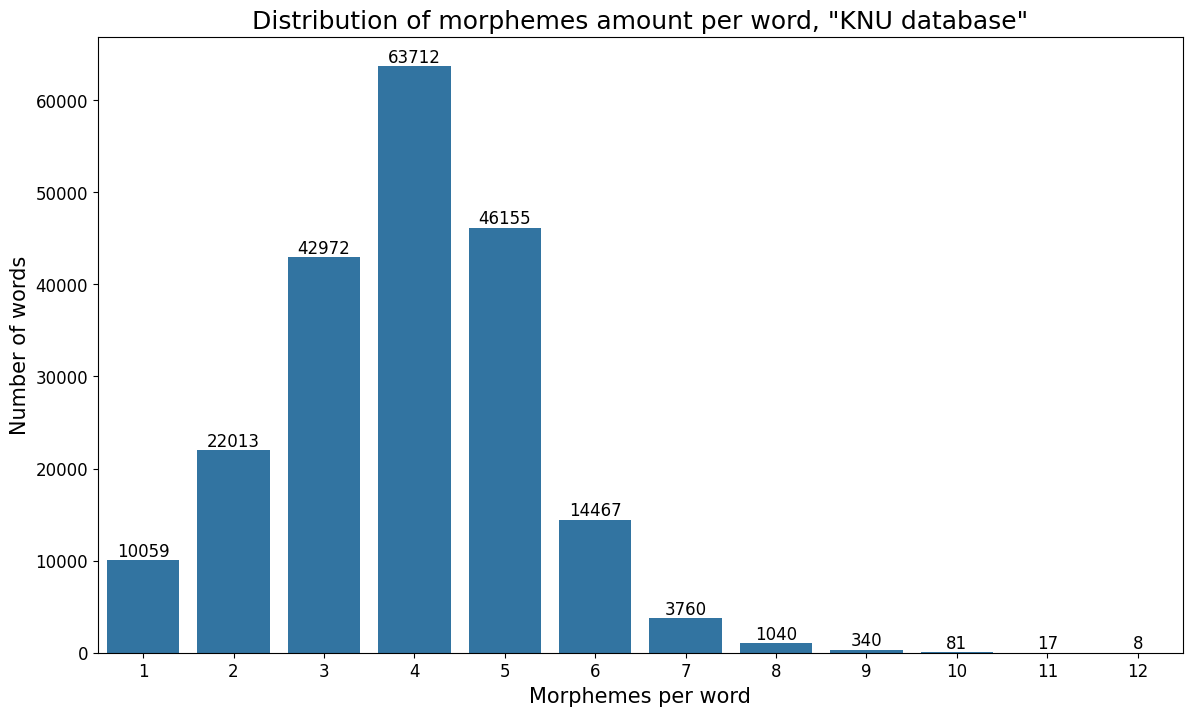

In [25]:
fig, ax = plt.subplots(figsize=(14, 8))

# Plot bar chart
sns.barplot(n_morphemes_value_counts, ax=ax)

# Add labels on top of bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,  # X position
            p.get_height(),  # Y position
            int(p.get_height()),  # Text (count)
            ha='center', va='bottom', fontsize=12)  # Alignment

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
# Labels and title
ax.set_xlabel("Morphemes per word", fontsize=15)
ax.set_ylabel("Number of words", fontsize=15)
ax.set_title("Distribution of morphemes amount per word, \"KNU database\"", fontsize=18)

# Set y-axis ticks

plt.show()

### WordCloud

In [37]:
text = ','.join(morphemes_val_count.loc[:50, 'morphemes'])
text

'ий,ти,а,н,о,ува,я,к,ся,и,по,ов,за,ен,нн,не,ість,роз,ви,на,в,юва,у,з,пере,і,ськ,с,при,про,ик,ова,від,е,ин,об,іш,іj,під,ну,л,т,ч,до,0,ва,льн,ів,ок,ат,енн'

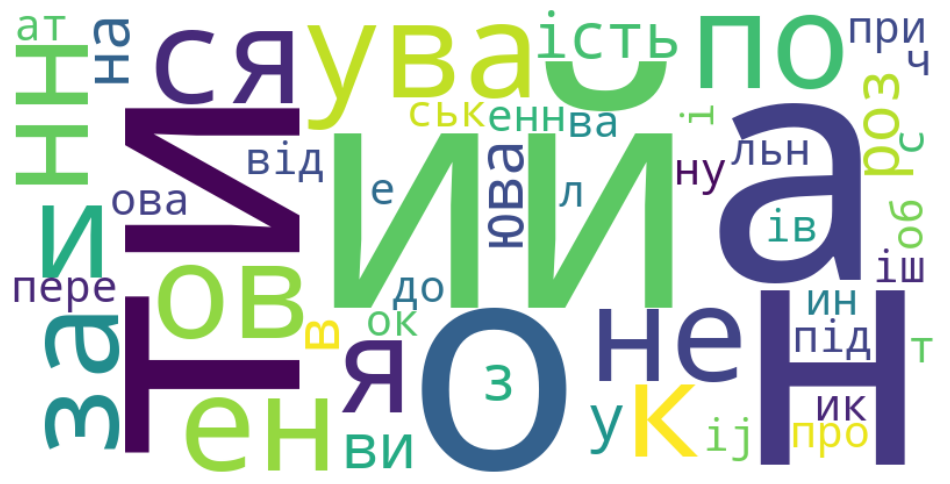

In [38]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axis
plt.show()

## Save vocabulary

In [39]:
morphemes_val_count.to_csv('../data/vocabulary/knu_vocabulary_with_counts.csv', index=False)